In [44]:
# Import needed libraries
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from integral_constraints import C, C_dx, C_dy, K, K_dvx, K_dvy, K_ddelta

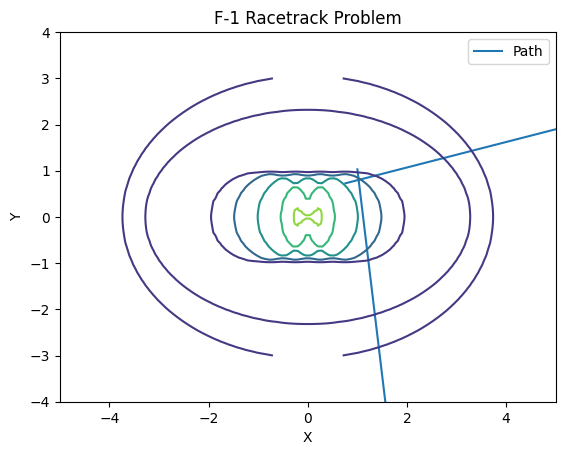

In [70]:
# Impose constant values for our parameters
L = 0.05
M = 3
W1 = 1
W2 = 10

# Element 1: The ODE Function
def ode(t, y, p):
    '''Defines the ODE system.'''
    eps = 1e-12  # Small epsilon to avoid division by zero
    return p[0] * np.array([y[2],
                            y[3],
                            1/(2*W1) * (y[8] * np.cos(y[4]) + y[9] * np.sin(y[4])) * np.cos(y[4]),
                            1/(2*W1) * (y[8] * np.cos(y[4]) + y[9] * np.sin(y[4])) * np.sin(y[4]),
                            (np.sqrt(y[2]**2 + y[3]**2 + eps)) * np.tan(y[5]) / (L + eps),  
                            (1/(2*W2)) * (y[11]),
                            100 * C_dx(y[0], y[1]),
                            100 * C_dy(y[0], y[1]),
                            -y[6] - y[10] * (y[2] / (np.sqrt(y[2]**2 + y[3]**2 + eps)) * np.tan(y[5]) / (L + eps)) + K_dvx(y[5], y[2], y[3]),
                            -y[7] - y[10] * (y[3] / (np.sqrt(y[2]**2 + y[3]**2 + eps)) * np.tan(y[5]) / (L + eps)) + K_dvy(y[5], y[2], y[3]),
                            y[8] * (1/(2*W1)) * (y[8] * np.cos(y[4]) + y[9] * np.sin(y[4])) * np.sin(y[4]) - y[9] * (1/(2*W1)) * (y[8] * np.cos(y[4]) + y[9] * np.sin(y[4])) * np.cos(y[4]),
                            (-y[10]/(L + eps)) * (np.sqrt(y[2]**2 + y[3]**2 + eps)) * 1/(np.cos(y[5]) / (L + eps))**2 + K_ddelta(y[5], y[2], y[3])])

# Element 2: The Boundary Conditions
def bc(ya, yb, p):
    '''Defines the boundary conditions.'''
    eps = 1e-12  # Small epsilon to avoid division by zero
    
    # Adjust boundary conditions to avoid division by zero
    u_acc = 1/(2*W1) * (yb[8] * np.cos(yb[4]) + yb[9] * np.sin(yb[4]) + eps)
    u_turn = (1/(2*W2)) * (yb[11] + eps)
    K_term = (1/((yb[2]**2 + yb[3]**2)/(L + eps)) * np.tan(yb[5] + eps) - M) 
    
    hamiltonian_condition = yb[6] * yb[2] + yb[7] * yb[3] + yb[8] * u_acc * np.cos(yb[4]) + yb[9] * u_acc * np.sin(yb[4]) + \
                    yb[10] * np.sqrt(yb[2]**2 + yb[3]**2 + eps) * np.tan(yb[5]) / (L + eps) + yb[11] * u_turn - \
                    (1 + 100 * C(yb[0], yb[1]) + W1 * (u_acc)**2 + W2 * (u_turn)**2 + K_term)

    return np.array([ya[0] + 1 , ya[1] + 1.25, yb[0] - 1, yb[1] - 1.25,  ya[2], ya[3], ya[4], ya[5], yb[8], yb[9], yb[10], yb[11], hamiltonian_condition])

# Element 3: The Time Domain
t_steps = 500
t = np.linspace(0, 1, t_steps)

# Element 4: The Initial Guess
y0 = np.ones((12, t_steps))
p0 = np.array([5])

# Step 5: Solve the BVP
sol = solve_bvp(ode, bc, t, y0, p0, max_nodes=60000)

# Get the X and Y components of the solution
X = sol.y[0]
Y = sol.y[1]

# Construct the meshgrid for the contour plot
X_lin = np.linspace(-4, 4, 100)
Y_lin = np.linspace(-3, 3, 100)
X_mesh, Y_mesh = np.meshgrid(X_lin, Y_lin)

# Plot data
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('F-1 Racetrack Problem')
plt.contour(X_mesh, Y_mesh, C(X_mesh, Y_mesh), levels=5, cmap='viridis')
plt.legend(['Path'])
plt.xlim(-5,5)
plt.ylim(-4, 4)
plt.show()
